In [1]:
from IPython.display import Image 
Image(filename='worm_muscle.png')

FileNotFoundError: [Errno 2] No such file or directory: 'worm_muscle.png'

In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import bar
from matplotlib import pyplot as plt
df = pd.DataFrame()
df = df.from_csv('digitized_histogram.csv')
columns = df.columns[0]
histogram_values = list(df.values)
histogram_values = [ float(i) for i in histogram_values ]
histogram_values.insert(0,float(df.columns[0]))
cv_axis = np.linspace(0,2,len(histogram_values))
df2 = pd.DataFrame(list(zip(cv_axis,histogram_values)))
fig = plt.figure()
width =  cv_axis[1] - cv_axis[0]
ind = cv_axis
#sum_of_hist = np.sum(histogram_values)
bins = np.arange(0,2.0,2.0/(len(histogram_values)))
plt.plot(bins,histogram_values)#,bins=np.arange(0,10*len(histogram_values),2));
plt.show()
bin_widths = 2.0/len(histogram_values)
!pwd


/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


/Users/rick/Dropbox (ASU)/dev/openworm/tests/owtests


In [18]:
cv_axis

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

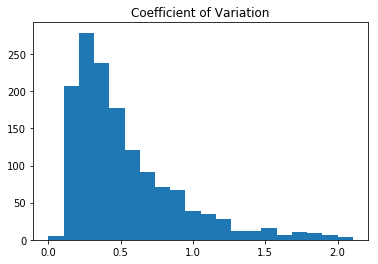

In [19]:
fig.clear()
plt.bar(cv_axis, histogram_values, width=width, align='edge')
plt.title('Coefficient of Variation')
plt.show()

In [20]:
fake_data = []
for i in range(0,len(histogram_values)):
    x = bins[i]+width/2
    counts = histogram_values[i]
    fake_data += [x]*int(counts)

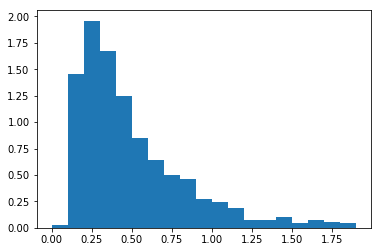

In [23]:
# Do the fit on the fake data to get the estmated parameters
from scipy.stats import gamma
shape,loc,scale = gamma.fit(fake_data)
plt.hist(fake_data,bins=np.arange(0,2.0,0.1),normed=True);

gamma parameters: 1.9641744161138601,0.04898895301815022,0.23027912309557552
mean: 0.501297315167614 and variance 0.10415717300457453


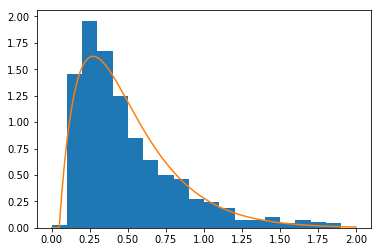

In [24]:
# Do the fit on the fake data to get the estmated parameters
shape,loc,scale = gamma.fit(fake_data)


mean, var, skew, kurt = gamma.stats(shape,loc=loc,scale=scale, moments='mvsk')
# Show the fake data, this time normed to integral 1
plt.hist(fake_data,bins=np.arange(0,2.0,0.1),normed=True);
# Show the gamma pdf with the estimated parameters.  
# It should match the fake data normed histogram pretty well, but might be slightly offset due
# to histogram bins not being centered
xs = np.arange(0,2.0,0.001)
plt.plot(xs,gamma.pdf(xs,shape,loc=loc,scale=scale));
print('gamma parameters: {0},{1},{2}'.format(shape,loc,scale))
print('mean: {0} and variance {1}'.format(mean,var))

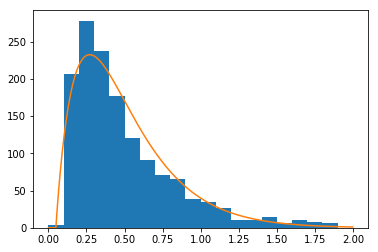

In [26]:
plt.hist(fake_data,bins=np.arange(0,2,0.1));
plt.plot(xs,sum(histogram_values)*0.1*gamma.pdf(xs,shape,loc=loc,scale=scale));

Of 1432 trials, the mean value of the coefficient of variation is approximately 
CV 0.736842   index of column 1 is 71.086054
the mode of the CV is 0.210526 index 278.73
The data is obviously skewed and the mode is possibly a good descriptor.
